# Polytropic processes


**Code:** #123-000

**File:** `apps/ideal_gas/polytropic_processes.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ikergym/MinervaLab/master?filepath=apps%2Fideal_gas%2Fpolytropic_processes.ipynb)

-----------

The aim of this notebook is to help visualize ploytropic processes for an ideal gas in a $PV$ diagram.

## Interface

The main interface (``main_block_123_000``) is divided in two HBox: ``top_block_123_000`` and ``body_block_123_000``.

``top_block_123_000`` contains the widgets two generate the polytoripic curves: ``jmin_slider``, ``jmax_slider``, ``jnum_slider`` and ``generate_button``.

``body_block_123_000`` contains three VBox: ``left_block_123_000``, ``center_block_123_000`` and ``right_block_123_000``.

``left_block_123_000`` contains the widgets to control the input parameters: ``gamma_dropdown``, ``mol_slider``, ``vi_slider``, ``pi_slider``, ``Ti_text``.

``center_block_123_000`` contains the bqplot figure ``fig_123_001``, the widget to control which curve is selected (``j_slider``), one input widget (``vf_slider``) and two output widgets: ``pf_text`` and ``Tf_text``.

``right_block_123_000`` contains the widgets related with energy or visualization: ``work_text``, ``energy_text``, ``heat_text``, ``show_work``, ``zoom_check`` and ``show_legend``.

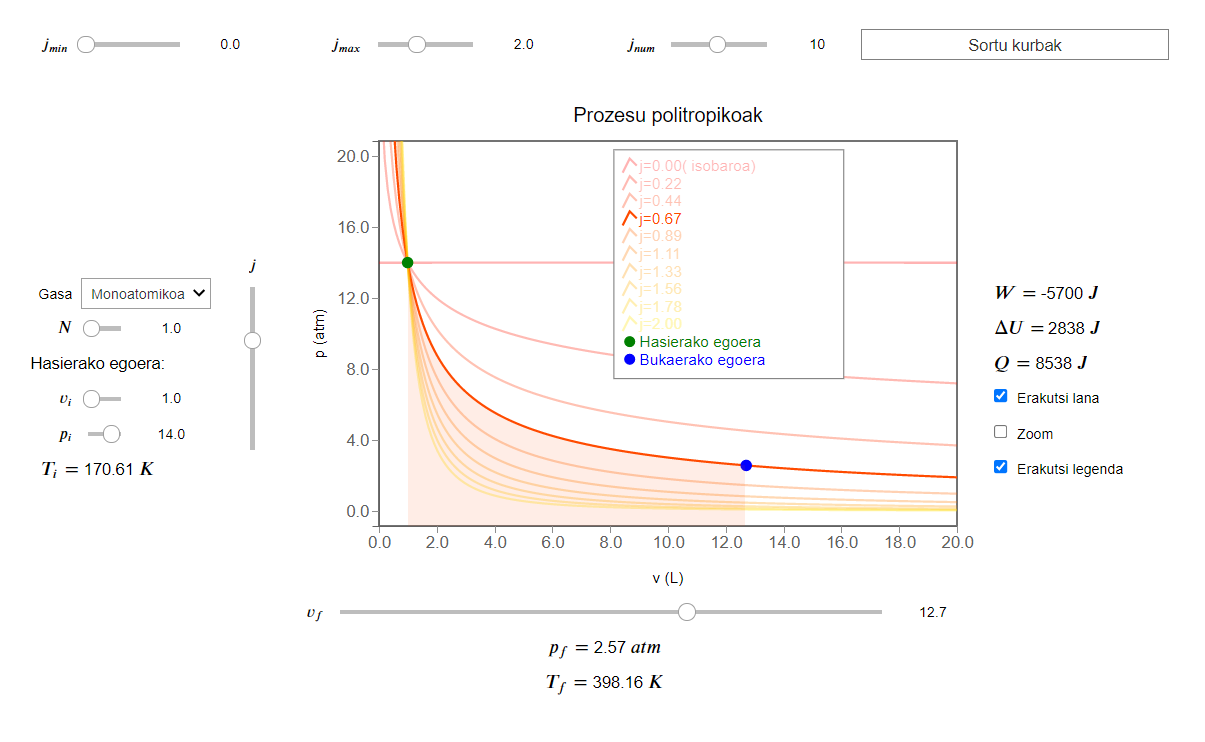

In [1]:
from IPython.display import Image
Image(filename='../../static/images/apps/ideal_gas/123-000.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [ ]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

## Packages

In [ ]:
import numpy as np

import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

## Physical functions

This are the functions that have a physical meaning:
- `get_process`
- `get_work`
- `get_energy_change`
- `change_mol`

In [ ]:
def get_process(vi,pi,j):
    '''
    This function calculates the (x,y) points to
    draw a polytropic curve of index j, for an ideall gas.
    
    Inputs:
    vi: float value for initial point volume
    pi: float value for initial point pressure
    j: polytopic index of the process
    
    Returns:
    (v_values, p_values) tuple containing:
    v_values: 1d numpy array of len=pts containing the x values of the points
    p_values: 1d numpy array of len=pts containing the y values of the points
    '''
    

    v_values = np.linspace(v_min, v_max, pts)
    p_values = np.empty((pts))
    for i in range(pts):
        p_values[i] = pi* (vi/v_values[i])**j
        if p_values[i] > 2*p_max:                    # This sentence truncates high y_values to prevent memory overflow
            p_values[i] = 2*p_max
            
    return v_values, p_values
    

In [ ]:
def get_work(vi, pi, vf, pf, v_values, p_values):
    '''
    This function calculates the work done on the system (positive work)
    or done by the system (negative work), in a process described by the set of points
    (v_value, p_values), that goes from (vi,pi) to (vf,pf). This is accomplished by numerically
    integrating the curve:
    
    $$W = -\int_{i}^{f} pdV $$
    
    Inputs:
    vi: float value for initial point volume
    pi: float value for initial point pressure
    vf: float value for final point volume
    pf: float value for final point pressure
    v_values: 1d numpy array of len=pts containing the x values of the points
    p_values: 1d numpy array of len=pts containing the y values of the points
    
    
    Returns:
    W = float value for the work done on the system (positive W) or by the system (negative W)
    '''


    W = 0.0
    dv = (v_max - v_min) / pts
    j = 0
    if vf < vi:    # This sentence specifies the direction of integration, and so the sign of W
        vi, vf = vf, vi
        dv = -dv
    for i  in range(pts):
        v = v_values[i]
        p = p_values[i]
        if v > vf:
            break
        elif v > vi:
            W = W - p*dv
    W = C*W    # Convert W form atm*L to J
    return W
        

In [ ]:
def get_energy_change(vi, pi, vf, pf, gamma):
    '''
    This function calculates the change in the energy of an ideal gas
    with adiabatic coefficien gamma tha undergoes a process starting
    on point (vi,pi) and ending on point (vf,pf)
    
    Inputs:
    vi: float value for initial point volume
    pi: float value for initial point pressure
    vf: float value for final point volume
    pf: float value for final point pressure
    gamma: adiabatic coefficient of the gas   
    '''

    Cv = 1.0 / (gamma-1.0) #Adimensional value of Cv (Cv/NR indeed)
    dU = C * Cv*(vf*pf - vi*pi) # Energy difference in Joules
    return dU

In [ ]:
def change_mol(change):
    '''
    This function calculates the new temperature values whenever
    the mol value is changed, and calls the update_pT_label() function
    to update is outputed values. 
    '''


    # Read widgets
    vi = vi_slider.value
    pi = pi_slider.value
    vf = vf_slider.value
    gamma = gamma_dropdown.value
    j = j_slider.value
    N = mol_slider.value

    # Calculate pT values
    Ti = vi*pi/N/R
    pf = pi* (vi/vf)**j
    Tf = vf*pf/N/R

    # Update output labels
    update_pT_labels(Ti,pf,Tf)

## Functions related to the interaction

In [ ]:
def update_pT_labels(Ti,pf,Tf):
    '''
    This function updates the labels of the pressure and
    Temperatures widgets that show as outputs on the GUI.
    This function is called whenever any of this values is changed.
    
    Inputs:
    Ti: float value for new initial temperature
    pf: float value for new final pressure
    Tf: float value for new final temperature
    '''

    Ti_text.value = '%.2f' % Ti
    pf_text.value ='%.2f' % pf
    Tf_text.value ='%.2f' % Tf

In [ ]:
def update_energy_labels(W, dU, Q):
    '''
    This function updates the labels of the energies
    widgets that show as outputs on the GUI.
    his function is called whenever any of this values is changed.
    
    Inputs:
    W: float value for new work
    dU: float value for new energy change
    Q: float value for new heat
    '''
    
    work_text.value = '%.0f' % W
    energy_text.value ='%.0f' % dU
    heat_text.value ='%.0f' % Q

In [ ]:
def update_legend(change):
    '''
    This function updatets the j values displayed on the legend.
    This function is called whenever the generate button is clicked.
    If a given process has a special name (i.e. 'isothermal' fir j=1.0),
    it also displays that name.
    '''

    # Read widgets
    gamma = gamma_dropdown.value
    j_num = len(j_slider.options)
    j_values = j_slider.options
      
    
    # Format j values
    j_values_formatted = []
    for i in range(j_num):
        spname=''
        k = j_num-1 -i
        if abs(j_values[k]-0.0) < 1e-5:
            spname='( isobaroa)'
        elif abs(j_values[k]-1.0) < 1e-5:
            spname='( isotermoa)'
        elif abs(j_values[k]-gamma) < 1e-5:
            spname='( adiabatikoa)'
        j_values_formatted.append('j=%.2f' % j_values[j_num-1-i] + spname)
    
    # Update output labels
    curves.labels = j_values_formatted

In [ ]:
def update_fill(change):
    '''
    This function controls the filled area mark that represents
    the work done. It updates the values for defining the area whenever
    the curve changes. It also controls when to show or hide the area
    and its color (to match the color of the current process).
    '''

    # Read widgets
    vi = vi_slider.value
    vf = vf_slider.value
    j_num = len(j_slider.options)
    process = j_num - j_slider.index -1
    colors = curves.colors    
    v_values = curves.x[process]
    p_values = curves.y[process]
    
    # Get the fillcurve (x,y) values
    fill_x = []
    fill_y = []
    
    if show_work_check.value == True:        
        fill_opacities = [0.1]
        for i in range(pts):
            v = v_values[i]
            p = p_values[i]
            if v > vi and v < vf:
                fill_x.append(v)
                fill_y.append(p)        
    else:
        fill_opacities = [0.0]  # If show_work_check is unchecked, no calculation is needed.        

    # Update fillcurve parameters
    fillcurve.x = fill_x
    fillcurve.y = fill_y
    fillcurve.fill_colors = [colors[process]]
    fillcurve.fill_opacities = fill_opacities

In [ ]:
def update_opacities(change):
    '''
    This functions updated the opacities of the curves when the
    selected proces is changed or when the figure marks are repoloted.
    '''

    # Read widgets
    j_num = len(j_slider.options)
    process = j_num - j_slider.index -1
    
    # Get opacities
    opacities = []
    for i in range(j_num):
        opacities.append(0.3)
        
    opacities[process] = 1.0
    
    #Update opacities
    curves.opacities = opacities

In [ ]:
def update_points(change):
    '''
    This function updates the marks of the initial and final points
    and recalculates the values for temperature and energies and its
    outputed values. It then calls the update_fill() function to control
    which process area is to be shown if needed.
    '''

    # Read widgets
    vi = vi_slider.value
    pi = pi_slider.value
    gamma = gamma_dropdown.value
    j = j_slider.value
    j_num = len(j_slider.options)
    process = j_num - j_slider.index -1
    N = mol_slider.value
    vf = vf_slider.value
    
    # Conditional read
    if j_num == 1:
        v_values = curves.x
        p_values = curves.y
    else:
        v_values = curves.x[process]
        p_values = curves.y[process]

    #Calculate pT values
    Ti = vi*pi/N/R
    pf = pi * (vi/vf)**j
    Tf = vf*pf/N/R
    
    #Calculate energies
    W=get_work(vi,pi,vf,pf,v_values,p_values)
    dU=get_energy_change(vi,pi,vf,pf,gamma)
    Q=dU-W
    
    # Update the marks
    InitialPoint.x = [vi]
    InitialPoint.y = [pi]
    FinalPoint.x = [vf]
    FinalPoint.y = [pf]

    # Update output labels
    update_pT_labels(Ti,pf,Tf)
    update_energy_labels(W,dU,Q)

    # Update fillcurve
    update_fill(None)

In [ ]:
def update_figure(change):
    '''
    This funcion recalculates the (x,y) poit sets of all the processes
    whenever the inital point is changed and replots them. Then it calls
    some functions to update the other parameters of the figure.
    '''

    # Read widgetrs
    vi = vi_slider.value
    pi = pi_slider.value
    gamma = gamma_dropdown.value
    j_num = len(j_slider.options)
    j_values = j_slider.options
    
    # Calcuate new curves points and colors
    x_values = []
    y_values = []
    
    for i in range(j_num):
        v_values , p_values = get_process(vi, pi, j_values[j_num-i-1])
        x_values.append(v_values)
        y_values.append(p_values)
       
    #Update the marks values and colors
    curves.x = x_values
    curves.y = y_values
    colors = generate_gradient('#FF0000', '#FFfa00', j_num) #generate a gradient from red to yellow
    curves.colors = colors
    
    # Update all other figure parameters
    update_opacities(None)
    update_points(None)
    update_legend(None)

In [ ]:
def generate_j_values(change):
    '''
    This functions generates the options list of the j slider
    and calls the update_figure() function to replot all the elements
    and display new output values. This funcion is called once to initialize
    the figure, and every time the generate button is clicked.
    '''
    
    # Read widgets
    j_min = jmin_slider.value
    j_max = jmax_slider.value
    j_num = jnum_slider.value

    
    # Correct absurd inputs:
    if j_min > j_max:
        j_min , j_max = j_max, j_min
        jmin_slider.value = j_min
        jmax_slider.value = j_max
    
    if abs(j_max - j_min) < 0.1*jmax_slider.step:
        if j_num != 1:
            j_num = 1
            jnum_slider.value = 1
    
    if j_num == 1:
        j_min = j_max
        jmin_slider.value = j_min
 

    # Update j_slider options list
    j_values = np.linspace(j_max, j_min, j_num)
    j_slider.options = j_values
    
    # Recalculate all parameters and update the figure 
    update_figure(None)

In [ ]:
def show_legend(change):
    '''
    This function controls the visibility of the
    legend depending on the value of the checkbox.
    '''
    
    curves.display_legend=change.new
    InitialPoint.display_legend=change.new
    FinalPoint.display_legend=change.new

In [ ]:
def update_zoom(Change):
    '''
    This function controls if the zoom is activated
    or not depending on the value of the checkbox.
    '''
    
    zoom = zoom_check.value
    vi = vi_slider.value
    pi = pi_slider.value
    vf = vf_slider.value
    pf = np.min(curves.y)
    
    
    if zoom == True: 
        scale_x = bqs.LinearScale(min = min(vi,vf)-0.2, max = max(vi,vf)+0.2)
        scale_y = bqs.LinearScale(min = min(pi,pf)-0.2, max = max(pi,pf)+0.2)
        axis_x.scale = scale_x
        axis_y.scale = scale_y    
        for mark in fig_123_001.marks:
            mark.scales = {'x': scale_x, 'y': scale_y}
    else:
        scale_x = bqs.LinearScale(min = v_min, max = v_max)
        scale_y = bqs.LinearScale(min = p_min, max = p_max)
        axis_x.scale = scale_x
        axis_y.scale = scale_y    
        for mark in fig_123_001.marks:
            mark.scales = {'x': scale_x, 'y': scale_y}

## Functions related to visualization

In [ ]:
def hex_to_rgb(number_hex):
    '''
    This function transforms a color represented with a string
    with it's RGB values in HEX to a tuple of three
    integer numbers in DEC representing each of the RGB values.
    
    Inputs:
    number_hex: string formatted as '#RRGGBB' where RR represents the R component in HEX and so on.
    
    Returns:
    (r, g, b) tuple containing:
    r: int number that represents the R component in DEC (scale from 0 to 255)
    g: int number that represents the G component in DEC (scale from 0 to 255)
    b: int number that represents the B component in DEC (scale from 0 to 255)   
    '''
    
    if '#' in number_hex:
        number_hex = number_hex[1:]
    
    return (int(number_hex[0:2], 16), int(number_hex[2:4], 16), int(number_hex[4:], 16))

In [ ]:
def rgb_to_hex(number_rgb):
    '''
    This function transforms a color represented with a tuple 
    of three integer numbers in DEC representing each of the RGB values
    (like (255, 255, 255)) to a string with it's RGB values in HEX
    (like '#FFFFFF').
    '''
    
    return '#' + format(number_rgb[0], '02x') + format(number_rgb[1], '02x') + format(number_rgb[2], '02x')

In [ ]:
def generate_gradient(initial, final, length):
    '''
    This function generates a gradient of colors
    from given initial and final colors.
    
    Inputs:
    initial: string for the initial color formatted as '#RRGGBB' where RR represents the R component in HEX and so on.
    final: string for the final color formatted as '#RRGGBB' where RR represents the R component in HEX and so on.
    length: integer for the number of colors to generate.
    
    Returns:
    colors = list containing the colors (in formatted HEX) of the generated gradient
    '''
    
    i_r, i_g, i_b = hex_to_rgb(initial)
    f_r, f_g, f_b = hex_to_rgb(final)
    
    r_step = (f_r - i_r)/length
    g_step = (f_g - i_g)/length
    b_step = (f_b - i_b)/length
    
    r, g, b = i_r, i_g, i_b
    colors = []
    
    for i in range(length):

        h = rgb_to_hex((int(round(r)),int(round(g)),int(round(b))))
        
        colors.append(h)
        
        r = r + r_step
        g = g + g_step
        b = b + b_step

    return colors

## Main interface

In [ ]:
#######################
###   PARAMETERS    ###
#######################

## Global Parameters

R = 0.082057 # Ideal gas constant in atm*L/mol/K
C = 101.325 # Conversion factor from atm*L to J -> C = J/atmL
pts = 200 # Number of points for plotting each process


## Limits of parameters (volumes in L, pressures in atm)

# Limits of the figure:
v_min = 0.01 
v_max = 20.0
p_min = 0.01
p_max = 20.0

#Limits of the j sliders in the top block
j_lowerbound = 0.0
j_upperbound = 5.0
max_j_num = 20


## Default values

# j values on top block
j_min = 0.0
j_max = 2.0
j_num = 10

# Gas values on left block
vi = 1.0
pi = 14.0
vf = 14.0
gamma = 5.0/3.0 # Adiabatic index (5/3 for monoatomic gases, 7/5 for diatomic gases at room temperature)
N = 1.0 # Number of mols of gas



########################
###CREATE THE FIGURES###
########################

fig_123_001 = bq.Figure(title='Prozesu politropikoak',
                marks=[],
                axes=[],
                padding_x=0.0,
                animation_duration=0,
                legend_location='top-right',
                legend_style= {'fill': 'white', 'stroke': 'grey'},
                background_style= {'fill': 'white',  'stroke': 'black'},
                fig_margin=dict(top=70, bottom=60, left=80, right=30),
                toolbar = True,
                layout=widgets.Layout(width='100%')
    )


scale_x = bqs.LinearScale(min = v_min, max = v_max, allow_padding=False)
scale_y = bqs.LinearScale(min = p_min, max = p_max)

axis_x = bqa.Axis(scale=scale_x,
                tick_format='.1f',#'0.2f',
                tick_style={'font-size': '15px'},
                tick_values = np.linspace(v_min, v_max, 11),
                grid_lines = 'none',
                grid_color = '#8e8e8e', 
                label='v (L)',
                label_location='middle',
                label_style={'stroke': 'black', 'default-size': 35},
                label_offset='50px')

axis_y = bqa.Axis(
                scale=scale_y,
                tick_format='.1f',#'0.2f',
                tick_style={'font-size': '15px'},
                tick_values= np.linspace(p_min, p_max, 6),
                grid_lines = 'none',
                grid_color = '#8e8e8e', 
                orientation='vertical',
                label='p (atm)',
                label_location='middle',
                label_style={'stroke': 'red', 'default_size': 35},
                label_offset='50px')

fig_123_001.axes = [axis_x,axis_y]


########################
####CREATE THE MARKS####
########################


curves = bqm.Lines(
                x = [], 
                y = [], 
                scales = {'x': scale_x, 'y': scale_y},
                display_legend=True
)



InitialPoint = bqm.Scatter(
    name = 'Initial Point',
    x = [],
    y = [],
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0],
    visible = True,
    colors = ['green'],
    names = [],
    labels=['Hasierako egoera'],
    display_legend = True
)      


FinalPoint = bqm.Scatter(
    name = 'Final Point',
    x = [],
    y = [],
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0],
    visible = True,
    colors = ['blue'],
    names = [],
    labels=['Bukaerako egoera'],
    display_legend = True
)      

# Auxiliary curve whose Domine goes from vi to vf, to limit the filled area to that region
fillcurve = bqm.Lines(
                x = [], 
                y = [], 
                scales = {'x': scale_x, 'y': scale_y},
                opacities = [0.0],
                fill_opacities = [0.0],
                fill = 'bottom',
                display_legend=False
)

fig_123_001.marks = [curves, InitialPoint, FinalPoint, fillcurve]

########################
######  WIDGETS  #######
########################

## Top block (j index values generator block)

jmin_slider = widgets.FloatSlider(
    value=j_min,
    min=j_lowerbound,
    max=j_upperbound,
    step=0.1,
    description='$j_{min}$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='100%'),
)

jmax_slider = widgets.FloatSlider(
    value=j_max,
    min=j_lowerbound,
    max=j_upperbound,
    step=0.1,
    description='$j_{max}$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='100%'),
)

jnum_slider = widgets.IntSlider(
    value=j_num,
    min=1,
    max=max_j_num,
    description='$j_{num}$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='100%'),
)

generate_button = widgets.Button(
    description='Sortu kurbak',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    layout=widgets.Layout(width='100%'),
    tooltip='Click me'
)

generate_button.on_click(generate_j_values)


## Left block (Initial state and process block)

gamma_dropdown = widgets.Dropdown(
    options=[('Monoatomikoa',5.0/3.0), ('Diatomikoa',7.0/5.0)],
    value=gamma,
    description='Gasa',
    disabled=False,
    layout=widgets.Layout(width='95%')
)

gamma_dropdown.observe(update_figure, 'value')

mol_slider = widgets.FloatSlider(
    value=1.0,
    min=v_min,
    max=v_max,
    step=0.1,
    description='$N$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='95%'),
)

mol_slider.observe(change_mol, 'value')



vi_slider = widgets.FloatSlider(
    value=vi,
    min=v_min,
    max=v_max,
    step=0.1,
    description='$v_i$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='95%'),
)

vi_slider.observe(update_figure, 'value')


pi_slider = widgets.FloatSlider(
    value=pi,
    min=p_min,
    max=p_max,
    step=0.1,
    description='$p_i$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='95%'),
)

pi_slider.observe(update_figure, 'value')

Ti_text = widgets.Label(value='')


## Center block (figure block)

j_slider = widgets.SelectionSlider(
    options=[0], # This value in non-important as the options list will be updated on execution. But non a empty list must be provided.
    description='$j$',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=False,  # Readout is currently disabled because it doesn't fit the requiered formmat
    #readout_format='.2f',
    layout = widgets.Layout(width = '%10', height = '80%', margin = '45px 0 0 0')
)

j_slider.observe(update_figure, names='value')


vf_slider = widgets.FloatSlider(
    value=vf,
    min=v_min,
    max=v_max,
    step=0.1,
    description='$v_f$',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='95%'),
)

vf_slider.observe(update_points, 'value')

pf_text = widgets.Label(value='')
Tf_text = widgets.Label(value='')


## Right block (energy block)

work_text = widgets.Label(value='')
energy_text = widgets.Label(value='')
heat_text = widgets.Label(value='')

show_work_check = widgets.Checkbox(
    description='Erakutsi lana',
    disabled=False,
    value=False,
    indent=False,
    layout=widgets.Layout(width='95%')
)

show_work_check.observe(update_fill,'value')

##
zoom_check = widgets.Checkbox(
    description='Zoom',
    disabled=False,
    value=False,
    indent=False,
    layout=widgets.Layout(width='95%')
)

zoom_check.observe(update_zoom,'value')

show_legend_check = widgets.Checkbox(
    description='Erakutsi legenda',
    disabled=False,
    value=True,
    indent=False,
    layout=widgets.Layout(width='95%')
)

show_legend_check.observe(show_legend,'value')

########################
###  INIT FIGURES  ####
########################

generate_j_values(None)


########################
######  LAYOUT  ########
########################

## Top Block ##
top_block_123_000 = widgets.HBox([], layout=widgets.Layout(width='100%', align_items='center'))
top_block_123_000.children = [jmin_slider, jmax_slider, jnum_slider, generate_button]


## Left Block ##
left_block_123_000 = widgets.VBox([], layout=widgets.Layout(width='20%', align_items='center'))
left_block_123_000.children = [gamma_dropdown, mol_slider, widgets.Label(value="Hasierako egoera:"), vi_slider, pi_slider,
                               widgets.HBox([widgets.Label(value='$T_i=$'),Ti_text,widgets.Label(value='$K$')]),
                               ]
                              
## Center Block ##
center_block_123_000 = widgets.VBox([], layout=widgets.Layout(width='65%', align_items='center'))
center_block_123_000.children = [widgets.HBox([j_slider,fig_123_001], layout=widgets.Layout(width='100%', align_items='center')),
                                 vf_slider,
                                 widgets.HBox([widgets.Label(value='$p_f=$'),pf_text,widgets.Label(value='$atm$')]),
                                 widgets.HBox([widgets.Label(value='$T_f=$'),Tf_text,widgets.Label(value='$K$')])
                                ]

## Right Block ##
right_block_123_000 = widgets.VBox([], layout=widgets.Layout(width='15%'))
right_block_123_000.children = [
                                widgets.HBox([widgets.Label(value='$W=$'),work_text,widgets.Label(value='$J$')], layout=widgets.Layout(width='100%')),
                                widgets.HBox([widgets.Label(value='$\Delta U=$'),energy_text,widgets.Label(value='$J$')], layout=widgets.Layout(width='100%')),
                                widgets.HBox([widgets.Label(value='$Q=$'),heat_text,widgets.Label(value='$J$')], layout=widgets.Layout(width='100%')),
                                show_work_check,zoom_check,show_legend_check
                               ]
                               
                                

## Main Block ##

body_block_123_000 = widgets.HBox([],layout=widgets.Layout(width='100%', align_items='center'))
body_block_123_000.children = [left_block_123_000, center_block_123_000,right_block_123_000]

main_block_123_000 = widgets.VBox([],layout=widgets.Layout(width='100%', align_items='center'))
main_block_123_000.children = [top_block_123_000, body_block_123_000]

main_block_123_000